In [2]:
pip install pycaret

1. Business Understanding - Complete

2. Data Understanding
Dataset Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Feature Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

   

,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 21)"
5,Transformed train set shape,"(623, 21)"
6,Transformed test set shape,"(268, 21)"
7,Ignore features,2
8,Numeric features,3
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8202,0.8696,0.7071,0.8012,0.7511,0.6113,0.6143,0.3880
lightgbm,Light Gradient Boosting Machine,0.8169,0.8626,0.7069,0.7973,0.7477,0.6049,0.6092,0.2840
ada,Ada Boost Classifier,0.8122,0.8403,0.7486,0.7585,0.7521,0.6011,0.6025,0.4780
xgboost,Extreme Gradient Boosting,0.8009,0.8467,0.6947,0.7666,0.7272,0.5714,0.5746,0.2380
rf,Random Forest Classifier,0.7994,0.8460,0.7113,0.7557,0.7312,0.5716,0.5738,0.3860
lr,Logistic Regression,0.7929,0.8454,0.7068,0.7476,0.7231,0.5583,0.5623,0.1860
ridge,Ridge Classifier,0.7929,0.8465,0.6901,0.7527,0.7178,0.5550,0.5583,0.1780
lda,Linear Discriminant Analysis,0.7929,0.8462,0.6901,0.7527,0.7178,0.5550,0.5583,0.1820
et,Extra Trees Classifier,0.7913,0.8247,0.7113,0.7380,0.7234,0.5561,0.5573,0.3500
dt,Decision Tree Classifier,0.7850,0.7674,0.7197,0.7234,0.7207,0.5460,0.5468,0.1820


Processing:   0%|          | 0/79 [00:00<?, ?it/s]


5. Evaluation

Best Model Performance:
                            Model  Accuracy     AUC  Recall   Prec.      F1  \
gbc  Gradient Boosting Classifier    0.8202  0.8696  0.7071  0.8012  0.7511   

      Kappa     MCC  TT (Sec)  
gbc  0.6113  0.6143     0.388  


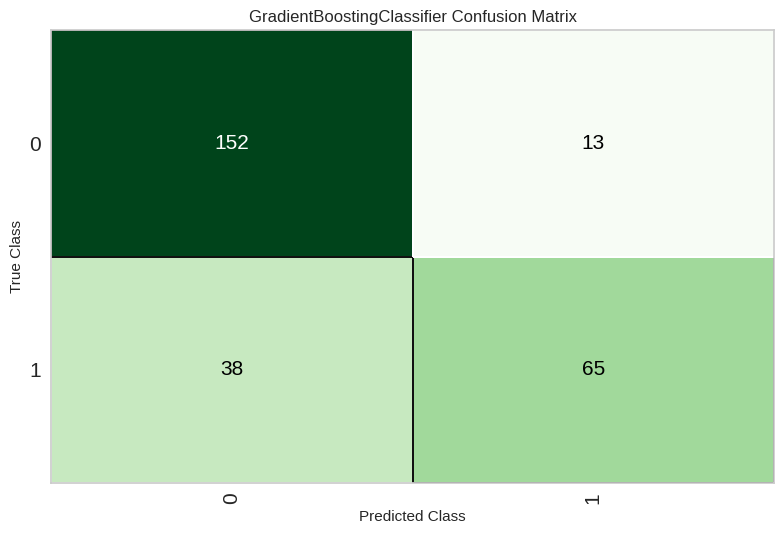

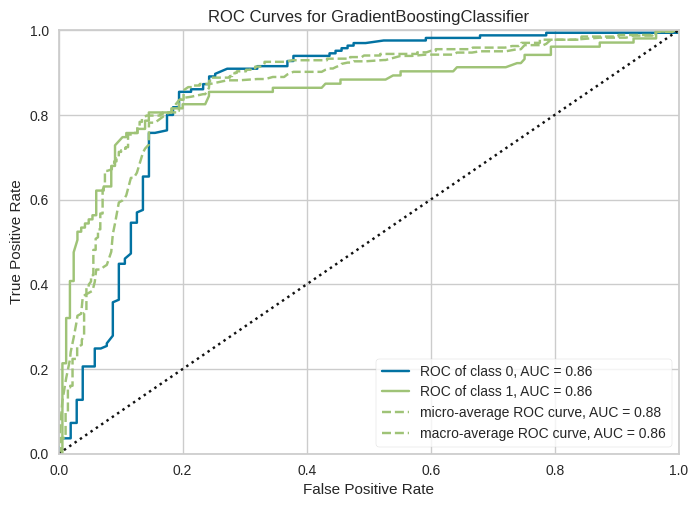


6. Deployment
Transformation Pipeline and Model Successfully Saved

Sample Prediction:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


   Pclass   Sex   Age  SibSp  Parch  Fare Embarked  Family_Size  Is_Alone  \
0       3  male  22.0      1      0  7.25        S            2         0   

  Fare_Bin Age_Bin  Survived  prediction_label  prediction_score  
0      Low   Adult         0                 0            0.9084  


In [9]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
# Goal: Predict passenger survival on Titanic
# Success Metrics: Accuracy, AUC-ROC, F1-Score
# Business Objective: Identify key factors influencing survival

# 2. Data Understanding
def explore_data():
    data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

    # Dataset overview
    print("Dataset Shape:", data.shape)
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nFeature Statistics:\n", data.describe())

    # Survival distribution
    print("\nSurvival Distribution:\n", data['Survived'].value_counts(normalize=True))

    return data

# 3. Data Preparation
def prepare_data(data):
    # Handle missing values
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

    # Feature engineering
    data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
    data['Is_Alone'] = (data['Family_Size'] == 1).astype(int)

    # Fare binning
    data['Fare_Bin'] = pd.qcut(data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

    # Age binning
    data['Age_Bin'] = pd.cut(data['Age'], bins=[0, 12, 20, 40, 60, 100],
                            labels=['Child', 'Young', 'Adult', 'Middle', 'Elder'])

    # Drop unnecessary columns
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    return data

# 4. Modeling
def build_models(processed_data):
    # Initialize setup
    exp = setup(
        data=processed_data,
        target='Survived',
        numeric_features=['Age', 'Fare', 'Family_Size'],
        categorical_features=['Sex', 'Embarked', 'Pclass', 'Fare_Bin', 'Age_Bin'],
        normalize=True,
        transformation=True,
        ignore_features=['SibSp', 'Parch'],
        session_id=42
    )

    # Compare models
    best_models = compare_models(
        n_select=16,
        sort='Accuracy',
        fold=5
    )

    return best_models

# 5. Evaluation
def evaluate_models(best_models):
    # Get performance metrics for best model
    print("\nBest Model Performance:")
    best_model = best_models[0]
    results = pull()
    print(results.head(1))

    # Feature Importance using valid plot type
    plot_model(best_model, plot='confusion_matrix')
    plot_model(best_model, plot='auc')

    # Create ensemble models
    voting = create_model('voting')
    stacking = create_model('stacking')

    return voting, stacking

# 6. Deployment
def evaluate_models(best_models):
    # Performance metrics for best model
    print("\nBest Model Performance:")
    best_model = best_models[0]
    results = pull()
    print(results.head(1))

    # Model visualization
    plot_model(best_model, plot='confusion_matrix')
    plot_model(best_model, plot='auc')

    return best_model, best_model  # Return same model twice to maintain interface

# Main execution remains same, just evaluation is simplified
if __name__ == "__main__":
    print("1. Business Understanding - Complete")

    print("\n2. Data Understanding")
    data = explore_data()

    print("\n3. Data Preparation")
    processed_data = prepare_data(data)

    print("\n4. Modeling")
    best_models = build_models(processed_data)

    print("\n5. Evaluation")
    model1, model2 = evaluate_models(best_models)

    print("\n6. Deployment")
    prediction_function = prepare_deployment(best_models[0])

    # Example prediction
    sample_passenger = processed_data.iloc[[0]].copy()
    print("\nSample Prediction:")
    print(prediction_function(sample_passenger))